# Capstone Project - The Battle of Neighborhoods


<img src="https://www.telegraph.co.uk/content/dam/Travel/hotels/europe/france/paris/paris-cityscape-overview-guide.jpg" alt="Alt text that describes the graphic" title="Title text" />

### WEEK 1 - Intoduction / Business problem

The Task

To investigate the city of Paris for a prime retail location to aid a retailor with data needed to open a store where foot traffic is ideal. Retailor is looking for heavy and constant foot traffic away from extremly high end retailors to match the business model. They have asked for research regarding location data for hotspots in the city where the most foot traffic is to meet the demand requirements for a retail store.

Outcomes

The goal is to identify the best districts to open new stores as part of the company's plan. The results will be translated to management in a simple form that will convey the data-driven analysis for the best locations to open retail stores. This will be concluded by showing visual grap

WEEK 1 - Data

In [2]:
# Import libraries
import numpy as np # library to handle data in a vectorized manner
import json # library to handle JSON files
import pandas as pd

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup

# Import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [3]:
# Loading CSV data found on the web to github account and then from github to pd pandas dataframe.

paris = pd.read_csv('https://raw.githubusercontent.com/AR-data-science/Coursera_Capstone/master/Arrondissements_.csv')
paris

,CAR,NAME,NSQAR,CAR.1,CARINSEE,LAR,NSQCO,SURFACE,PERIMETRE,Geometry_X,Geometry_Y
0,3,Temple,750000003,3,3,3eme Ardt,750001537,1170882828,4519264,48.862872,2.360001
1,19,Buttes-Chaumont,750000019,19,19,19eme Ardt,750001537,6792651129,11253182,48.887076,2.384821
2,14,Observatoire,750000014,14,14,14eme Ardt,750001537,5614877309,10317483,48.829245,2.326542
3,10,Entrepot,750000010,10,10,10eme Ardt,750001537,2891739442,6739375,48.876130,2.360728
4,12,Reuilly,750000012,12,12,12eme Ardt,750001537,16314782637,24089666,48.834974,2.421325
5,16,Passy,750000016,16,16,16eme Ardt,750001537,16372542129,17416110,48.860392,2.261971
6,11,Popincourt,750000011,11,11,11eme Ardt,750001537,3665441552,8282012,48.859059,2.380058
7,2,Bourse,750000002,2,2,2eme Ardt,750001537,991153745,4554104,48.868279,2.342803
8,4,Hotel-de-Ville,750000004,4,4,4eme Ardt,750001537,1600585632,5420908,48.854341,2.357630
9,17,Batignolles-Monceau,750000017,17,17,17eme Ardt,750001537,5668834504,10775580,48.887327,2.306777


In [4]:
# Renaming column names to easy to follow headers

paris.rename(columns={'NAME': 'Neighborhood ', 'CAR': 'Arrondissement_Num', 'Geometry_X': 'Latitude', 'Geometry_Y': 'Longitude',  'LAR': 'French_Name'}, inplace=True)
paris

,Arrondissement_Num,Neighborhood,NSQAR,CAR.1,CARINSEE,French_Name,NSQCO,SURFACE,PERIMETRE,Latitude,Longitude
0,3,Temple,750000003,3,3,3eme Ardt,750001537,1170882828,4519264,48.862872,2.360001
1,19,Buttes-Chaumont,750000019,19,19,19eme Ardt,750001537,6792651129,11253182,48.887076,2.384821
2,14,Observatoire,750000014,14,14,14eme Ardt,750001537,5614877309,10317483,48.829245,2.326542
3,10,Entrepot,750000010,10,10,10eme Ardt,750001537,2891739442,6739375,48.876130,2.360728
4,12,Reuilly,750000012,12,12,12eme Ardt,750001537,16314782637,24089666,48.834974,2.421325
5,16,Passy,750000016,16,16,16eme Ardt,750001537,16372542129,17416110,48.860392,2.261971
6,11,Popincourt,750000011,11,11,11eme Ardt,750001537,3665441552,8282012,48.859059,2.380058
7,2,Bourse,750000002,2,2,2eme Ardt,750001537,991153745,4554104,48.868279,2.342803
8,4,Hotel-de-Ville,750000004,4,4,4eme Ardt,750001537,1600585632,5420908,48.854341,2.357630
9,17,Batignolles-Monceau,750000017,17,17,17eme Ardt,750001537,5668834504,10775580,48.887327,2.306777


In [5]:
#Removing unwanted columns from dataset 

paris.drop(['NSQAR','CAR.1','CARINSEE','NSQCO','SURFACE', 'PERIMETRE' ], axis=1, inplace=True)
paris

,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude
0,3,Temple,3eme Ardt,48.862872,2.360001
1,19,Buttes-Chaumont,19eme Ardt,48.887076,2.384821
2,14,Observatoire,14eme Ardt,48.829245,2.326542
3,10,Entrepot,10eme Ardt,48.876130,2.360728
4,12,Reuilly,12eme Ardt,48.834974,2.421325
5,16,Passy,16eme Ardt,48.860392,2.261971
6,11,Popincourt,11eme Ardt,48.859059,2.380058
7,2,Bourse,2eme Ardt,48.868279,2.342803
8,4,Hotel-de-Ville,4eme Ardt,48.854341,2.357630
9,17,Batignolles-Monceau,17eme Ardt,48.887327,2.306777


## WEEK 1 Summary/Conclusion

- located and imported the relevant location data for the districts of Paris and constructed a dataframe.

- Defined the business objective, strategy and methods to achieve our goal

- Next step will be leveraging Foursquare location data to obtain data on high traffic areas - where consumers go for shopping, restaurants and entertainment - in all of the 20 districts.


In [6]:
paris.shape

(20, 5)

In [7]:
# Retrieve the Latitude and Longitude for Paris
from geopy.geocoders import Nominatim 

address = 'Paris'

# Define the user_agent as Paris_explorer
geolocator = Nominatim(user_agent="Paris_explorer")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinates of Paris France are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Paris France are 48.8566969, 2.3514616.


In [8]:
# create map of Paris using the above latitude and longitude values
map_paris = folium.Map(location=[latitude, longitude], zoom_start=12)


# add markers to map
for lat, lng, label in zip(paris['Latitude'], paris['Longitude'], paris['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=25,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_paris)  
    
map_paris

In [10]:
# Access Foursquare API using login

CLIENT_ID = 'SFPBINAYUNP2MV35U3L3RBQP0YLLY3L0NRSEO3I33A300SEG' # your Foursquare ID
CLIENT_SECRET = 'JKU4ZWN4PHK3UOYBHU41ULI04SYZAWPIBVY0LSEJAN5HHRZL' # your Foursquare Secret
VERSION = '20180604'

In [11]:
paris.loc[0, 'French_Name']
paris.loc[0, 'French_Name']

'3eme Ardt'

In [12]:
# Get the Neighborhood's latitude and longitude values.

neighborhood_latitude = paris.loc[0, 'Latitude'] # Neighborhood latitude value
neighborhood_longitude = paris.loc[0, 'Longitude'] # Neighborhood longitude value

neighborhood_name = paris.loc[0, 'French_Name'] # Neighborhood name

print('Latitude and longitude values of the neighborhood {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of the neighborhood 3eme Ardt are 48.86287238, 2.3600009859999997.


In [13]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # displays the URL

'https://api.foursquare.com/v2/venues/explore?&client_id=SFPBINAYUNP2MV35U3L3RBQP0YLLY3L0NRSEO3I33A300SEG&client_secret=JKU4ZWN4PHK3UOYBHU41ULI04SYZAWPIBVY0LSEJAN5HHRZL&v=20180604&ll=48.86287238,2.3600009859999997&radius=500&limit=100'

In [14]:
# Send the GET request and examine the resutls

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eeccc4ec8cff2001b579683'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Enfants-Rouges',
  'headerFullLocation': 'Enfants-Rouges, Paris',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 92,
  'suggestedBounds': {'ne': {'lat': 48.8673723845, 'lng': 2.3668285468065267},
   'sw': {'lat': 48.8583723755, 'lng': 2.353173425193473}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d974096a2c654814aa6d353',
       'name': 'Mmmozza',
       'location': {'address': '57 rue de Bretagne',
        'lat': 48.86391016055883,
        'lng': 2.360590696334839,
        'labeledLatLngs': [{'label': 'display',
          'lat': 48.8639101605588

In [15]:
# define a function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [16]:
# clean the json and structure it into a pandas dataframe.

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(20)

,name,categories,lat,lng
0,Mmmozza,Sandwich Place,48.863910,2.360591
1,Chez Alain Miam Miam,Sandwich Place,48.862781,2.362064
2,Marché des Enfants Rouges,Farmers Market,48.862806,2.361996
3,Square du Temple,Park,48.864475,2.360816
4,Le Burger Fermier des Enfants Rouges,Burger Joint,48.862831,2.362073
5,Chez Taeko,Japanese Restaurant,48.862734,2.362136
6,Okomusu,Okonomiyaki Restaurant,48.861453,2.360879
7,Hôtel Jules & Jim,Hotel,48.863496,2.357395
8,Bontemps,Dessert Shop,48.863956,2.360725
9,Chez Alain Miam Miam,Sandwich Place,48.862369,2.361950


In [17]:
# Check how many venues there are in 3eme Ardt within a radius of 500 meters

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

92 venues were returned by Foursquare.


In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['French_Name', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
# Create a new dataframe called paris_venues.

paris_venues = getNearbyVenues(names=paris['French_Name'],
                                   latitudes=paris['Latitude'],
                                   longitudes=paris['Longitude']
                                  )

3eme Ardt
19eme Ardt
14eme Ardt
10eme Ardt
12eme Ardt
16eme Ardt
11eme Ardt
2eme Ardt
4eme Ardt
17eme Ardt
18eme Ardt
1er Ardt
5eme Ardt
7eme Ardt
20eme Ardt
8eme Ardt
9eme Ardt
13eme Ardt
15eme Ardt
6eme Ardt


In [21]:
print(paris_venues.shape)
paris_venues.head(250)

(1275, 7)


,French_Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,3eme Ardt,48.862872,2.360001,Mmmozza,48.863910,2.360591,Sandwich Place
1,3eme Ardt,48.862872,2.360001,Chez Alain Miam Miam,48.862781,2.362064,Sandwich Place
2,3eme Ardt,48.862872,2.360001,Marché des Enfants Rouges,48.862806,2.361996,Farmers Market
3,3eme Ardt,48.862872,2.360001,Square du Temple,48.864475,2.360816,Park
4,3eme Ardt,48.862872,2.360001,Le Burger Fermier des Enfants Rouges,48.862831,2.362073,Burger Joint
5,3eme Ardt,48.862872,2.360001,Chez Taeko,48.862734,2.362136,Japanese Restaurant
6,3eme Ardt,48.862872,2.360001,Okomusu,48.861453,2.360879,Okonomiyaki Restaurant
7,3eme Ardt,48.862872,2.360001,Hôtel Jules & Jim,48.863496,2.357395,Hotel
8,3eme Ardt,48.862872,2.360001,Bontemps,48.863956,2.360725,Dessert Shop
9,3eme Ardt,48.862872,2.360001,Chez Alain Miam Miam,48.862369,2.361950,Sandwich Place


In [22]:
paris_venues.groupby('French_Name').count()


,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
French_Name,,,,,,
10eme Ardt,100,100,100,100,100,100
11eme Ardt,70,70,70,70,70,70
12eme Ardt,4,4,4,4,4,4
13eme Ardt,61,61,61,61,61,61
14eme Ardt,25,25,25,25,25,25
15eme Ardt,63,63,63,63,63,63
16eme Ardt,11,11,11,11,11,11
17eme Ardt,56,56,56,56,56,56
18eme Ardt,45,45,45,45,45,45


In [23]:
# Calculate how many unique categories there are.
print('There are {} unique venue categories.'.format(len(paris_venues['Venue Category'].unique())))

There are 199 unique venue categories.


In [24]:
# Analyze each of the Neighborhoods from the results

# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Neighborhood'] = paris_venues['French_Name'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# The shape of the dataframe is
paris_onehot.shape

(1275, 200)

In [26]:
paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()
paris_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,10eme Ardt,0.000000,0.02,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.020000,...,0.000000,0.010000,0.00,0.000000,0.000000,0.010000,0.020000,0.000000,0.00,0.00
1,11eme Ardt,0.014286,0.00,0.000000,0.00,0.00000,0.000000,0.014286,0.000000,0.028571,...,0.000000,0.014286,0.00,0.014286,0.014286,0.042857,0.000000,0.014286,0.00,0.00
2,12eme Ardt,0.000000,0.00,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.25
3,13eme Ardt,0.000000,0.00,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.180328,...,0.000000,0.000000,0.00,0.000000,0.229508,0.000000,0.000000,0.000000,0.00,0.00
4,14eme Ardt,0.000000,0.00,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00
5,15eme Ardt,0.000000,0.00,0.000000,0.00,0.00000,0.000000,0.000000,0.015873,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.015873,0.000000,0.00,0.00
6,16eme Ardt,0.000000,0.00,0.000000,0.00,0.00000,0.000000,0.090909,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00
7,17eme Ardt,0.000000,0.00,0.000000,0.00,0.00000,0.000000,0.017857,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00
8,18eme Ardt,0.000000,0.00,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.022222,0.022222,0.000000,0.000000,0.00,0.00
9,19eme Ardt,0.000000,0.00,0.023256,0.00,0.00000,0.000000,0.000000,0.000000,0.023256,...,0.000000,0.000000,0.00,0.000000,0.023256,0.000000,0.000000,0.000000,0.00,0.00


In [27]:
# The shape of the grouped data is
paris_grouped.shape

(20, 200)

In [28]:
# Each  neighborhood with top 10 most common venues

num_top_venues = 10

for hood in paris_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----10eme Ardt----
                 venue  freq
0    French Restaurant  0.12
1               Bistro  0.06
2          Coffee Shop  0.05
3                Hotel  0.04
4                 Café  0.04
5    Indian Restaurant  0.04
6  Japanese Restaurant  0.03
7          Pizza Place  0.03
8                  Bar  0.03
9   Seafood Restaurant  0.02


----11eme Ardt----
                 venue  freq
0    French Restaurant  0.10
1                 Café  0.07
2           Restaurant  0.06
3          Supermarket  0.04
4               Bakery  0.04
5          Pastry Shop  0.04
6             Wine Bar  0.04
7   Italian Restaurant  0.03
8     Asian Restaurant  0.03
9  Japanese Restaurant  0.03


----12eme Ardt----
                    venue  freq
0             Zoo Exhibit  0.25
1     Monument / Landmark  0.25
2             Supermarket  0.25
3                     Zoo  0.25
4     Japanese Restaurant  0.00
5             Music Store  0.00
6               Nightclub  0.00
7            Noodle House  0.00
8  Okonomiyak

In [29]:
# First sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [30]:
# create the new dataframe and display the top 10 venues for each neighborhood

num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
paris_venues_sorted = pd.DataFrame(columns=columns)
paris_venues_sorted['Neighborhood'] = paris_grouped['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    paris_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

paris_venues_sorted.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10eme Ardt,French Restaurant,Bistro,Coffee Shop,Café,Indian Restaurant,Hotel,Pizza Place,Japanese Restaurant,Bar,Mediterranean Restaurant
1,11eme Ardt,French Restaurant,Café,Restaurant,Bakery,Pastry Shop,Wine Bar,Supermarket,Italian Restaurant,Japanese Restaurant,Bar
2,12eme Ardt,Zoo Exhibit,Supermarket,Monument / Landmark,Zoo,Hotel Bar,Fish & Chips Shop,Farmers Market,Falafel Restaurant,Exhibit,Ethiopian Restaurant
3,13eme Ardt,Vietnamese Restaurant,Asian Restaurant,Thai Restaurant,Chinese Restaurant,French Restaurant,Juice Bar,Cambodian Restaurant,Cosmetics Shop,Farmers Market,Bus Stop
4,14eme Ardt,French Restaurant,Hotel,Plaza,Supermarket,Bistro,Tea Room,Bakery,Italian Restaurant,Pizza Place,Food & Drink Shop
5,15eme Ardt,Hotel,Italian Restaurant,French Restaurant,Coffee Shop,Supermarket,Bistro,Lebanese Restaurant,Thai Restaurant,Bakery,Brasserie
6,16eme Ardt,Plaza,Lake,Boat or Ferry,Art Museum,Bus Stop,Trail,Bus Station,Park,French Restaurant,Diner
7,17eme Ardt,Hotel,French Restaurant,Italian Restaurant,Bakery,Japanese Restaurant,Bistro,Plaza,Restaurant,Café,Portuguese Restaurant
8,18eme Ardt,French Restaurant,Bar,Coffee Shop,Convenience Store,Café,Hotel,Restaurant,Pizza Place,Sandwich Place,Cheese Shop
9,19eme Ardt,French Restaurant,Bar,Seafood Restaurant,Brewery,Bistro,Supermarket,Beer Bar,Café,Hotel,Creperie


In [31]:
# The shape of the sorted data is
paris_venues_sorted.shape

(20, 11)

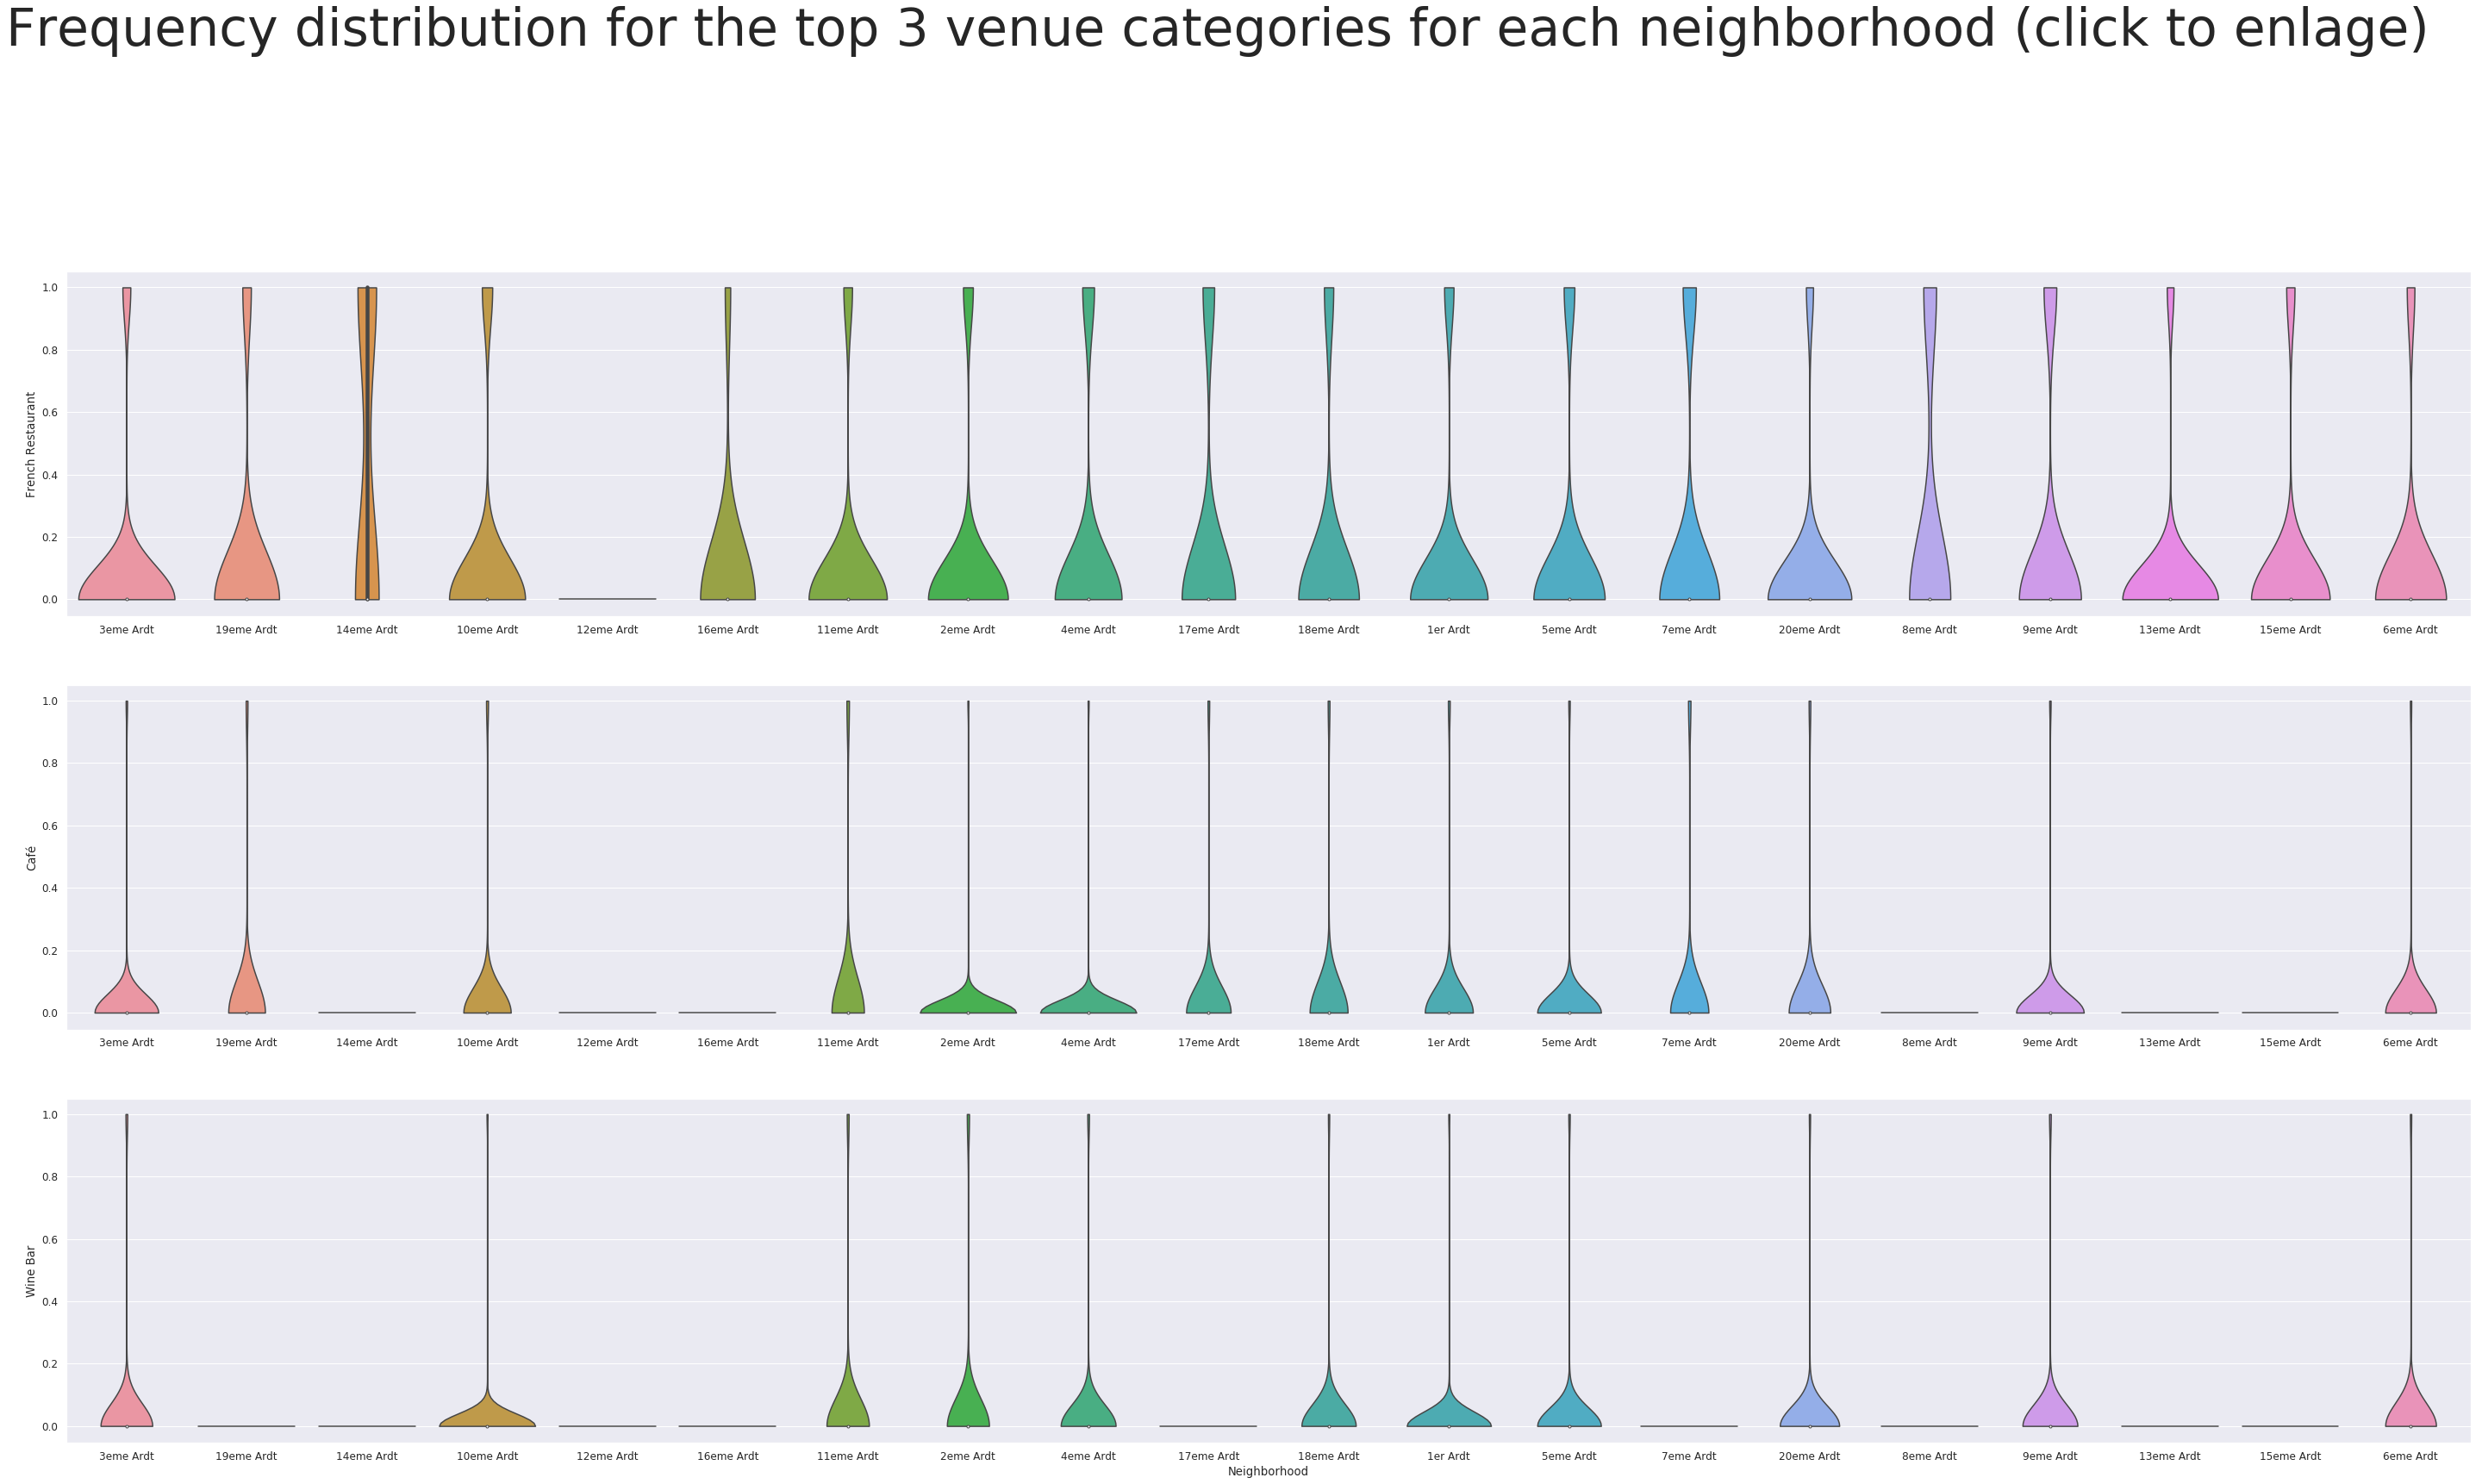

In [32]:
# Categorical plot
# Explore a plot of this data (a violin plot is used which is a density estimation of the underlying distribution).
# The top 3 venue types as specified by the client for each neighborhood are used for the plotting.

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(3,1,1)
sns.violinplot(x="Neighborhood", y="French Restaurant", data=paris_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(3,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=paris_onehot, cut=0);
plt.xlabel("")

plt.subplot(3,1,3)
sns.violinplot(x="Neighborhood", y="Wine Bar", data=paris_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (click to enlage)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories.png", dpi=240)
plt.show()

So as we can see from the analysis there are 10 neighborhoods that would be good places to open a retail store due to the high concentratoin of Restaurants, Cafe's and Wine bars which would draw the level of foot traffic needed to sustain the high demand for the retail store.


Neighborhoods that would make suitable canidates are as follows:

- 3eme Ardt
- 10eme Ardt
- 11eme Ardt
- 4eme Ardt
- 18eme Ardt
- 1er Ardt
- 5eme Ardt
- 20eme Ardt
- 9eme Ardt
- 6eme Ardt

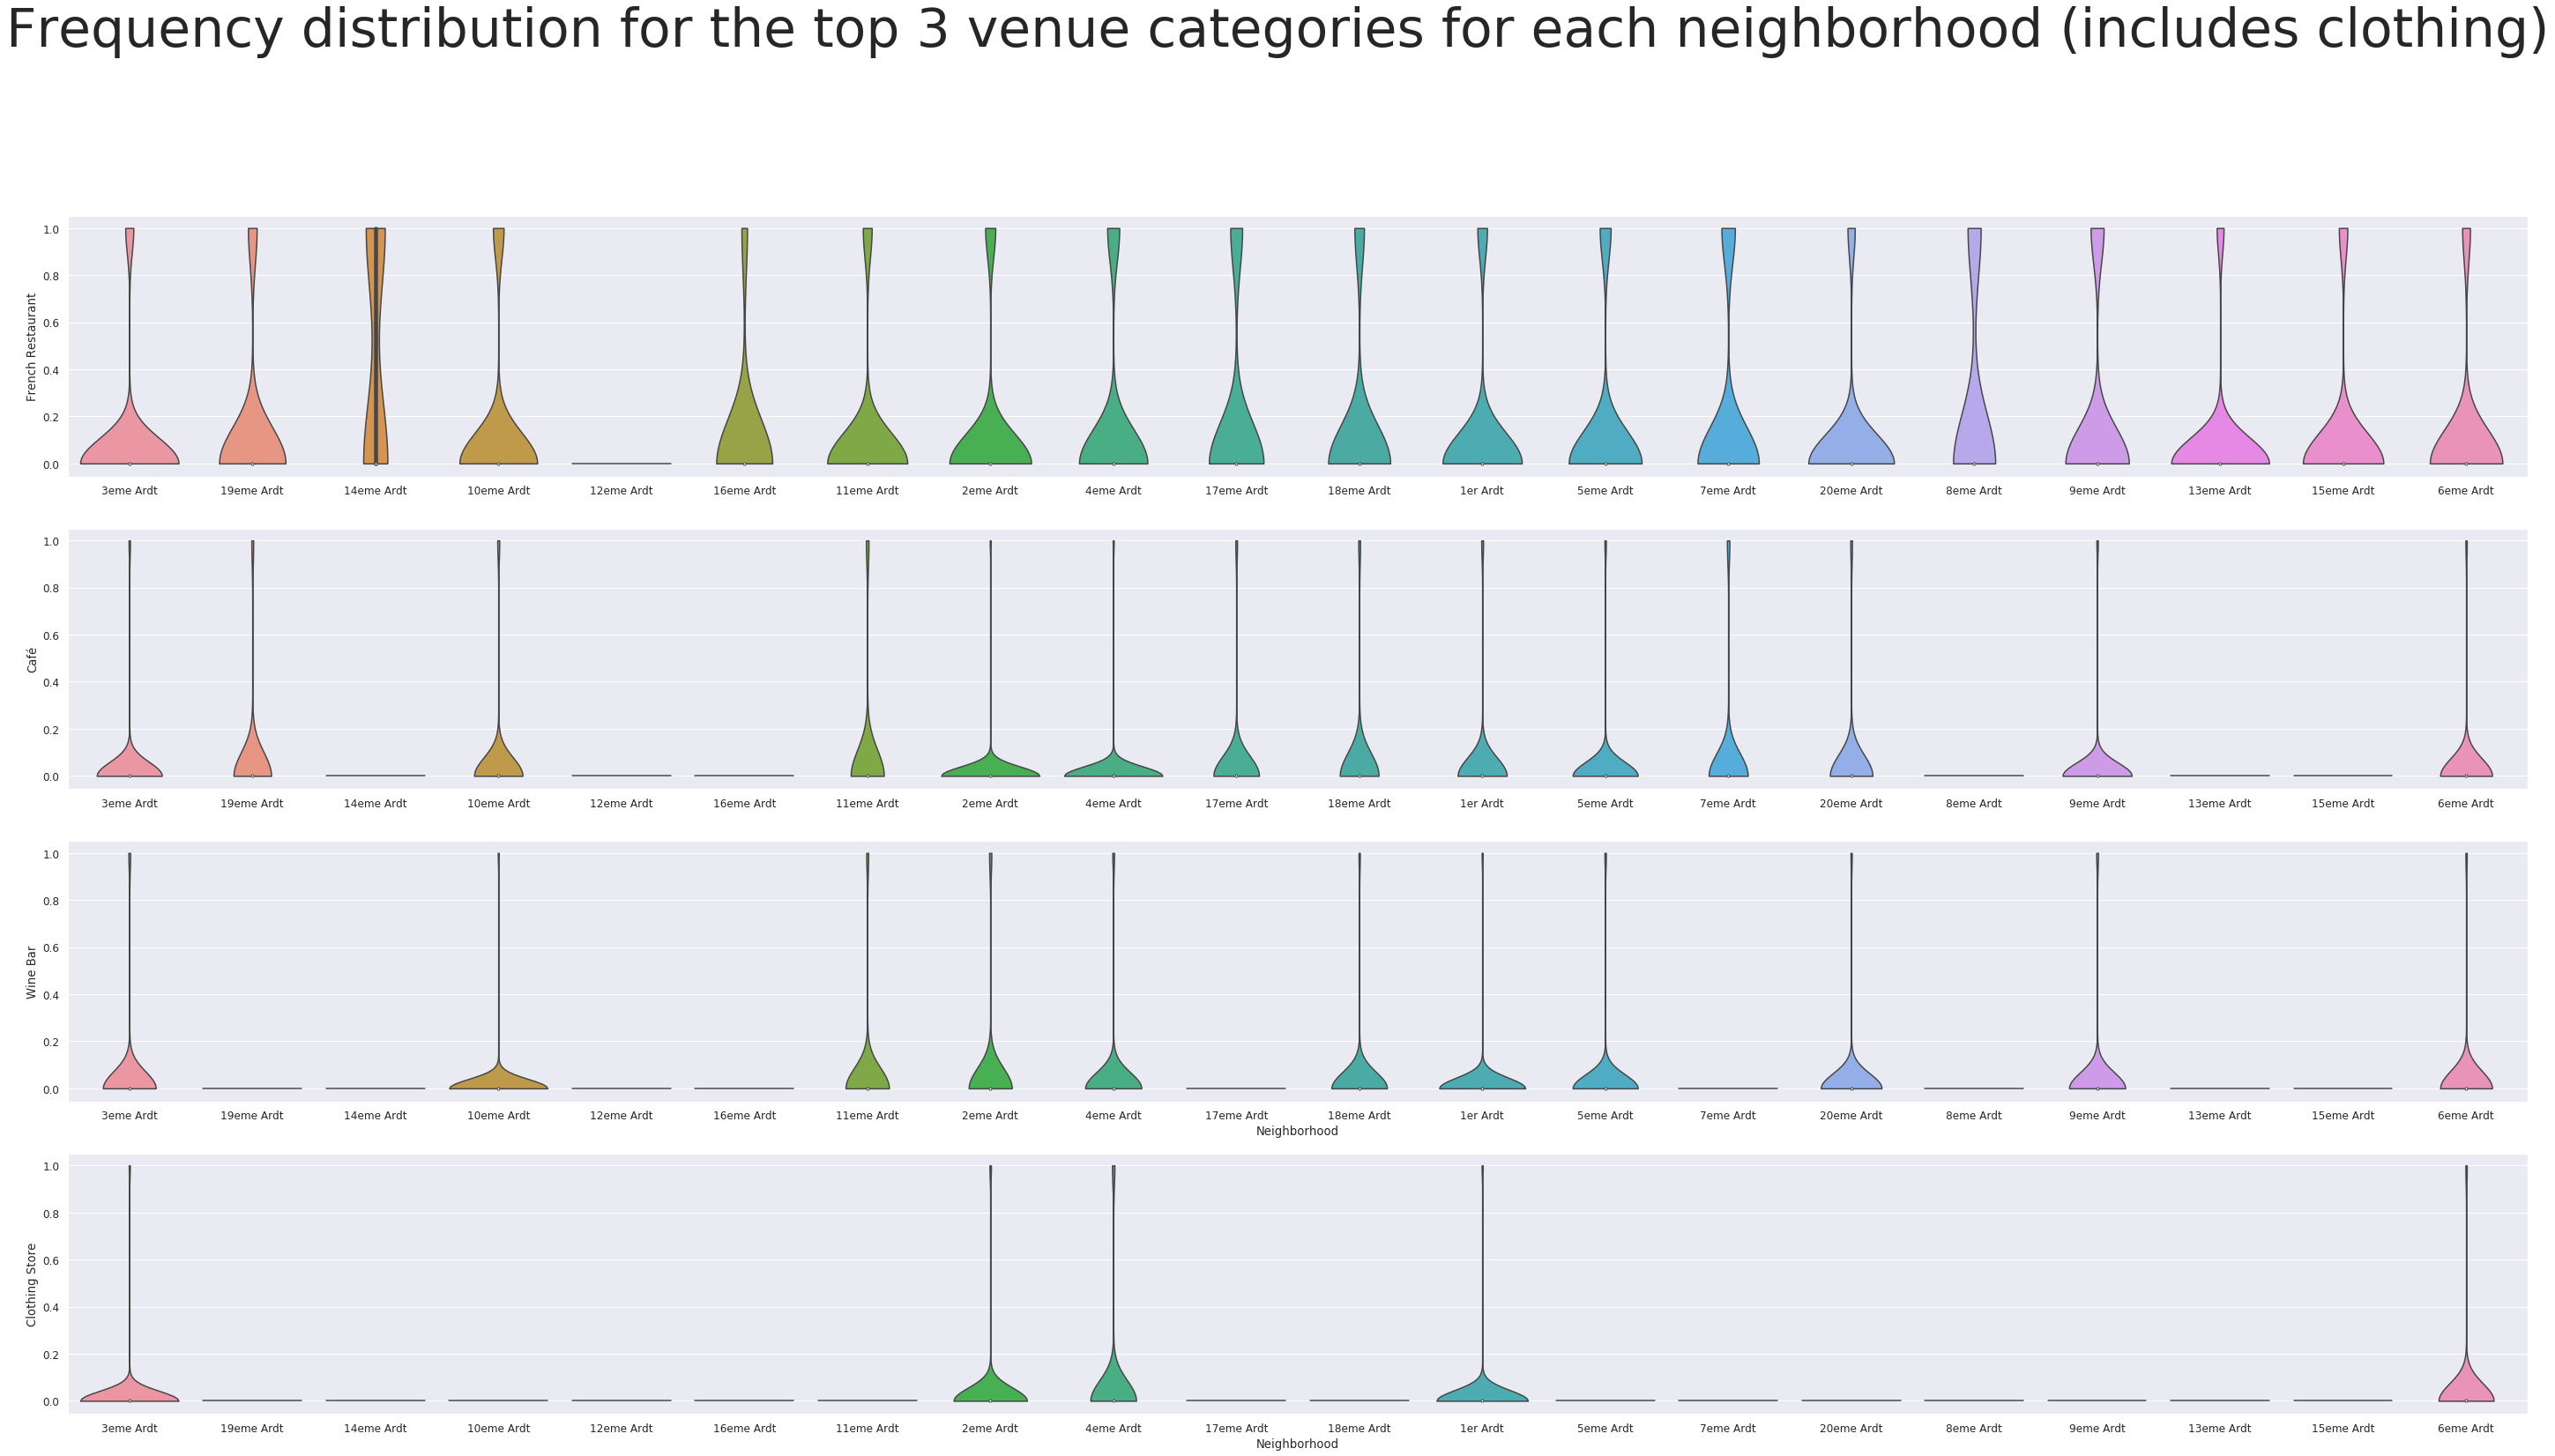

In [33]:
# Clothing_Store has been added to explore this category and make a comparison

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(4,1,1)
sns.violinplot(x="Neighborhood", y="French Restaurant", data=paris_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(4,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=paris_onehot, cut=0);
plt.xlabel("")

plt.subplot(4,1,3)
sns.violinplot(x="Neighborhood", y="Wine Bar", data=paris_onehot, cut=0);

plt.subplot(4,1,4)
sns.violinplot(x="Neighborhood", y="Clothing Store", data=paris_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (includes clothing)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories_clothing.png", dpi=240)
plt.show()

So we can increase the criteria to include Clothing Stores - which focuses the suggested districts for new stores to be located, and at the same time provides better locations for the brand due to increased presence of clothing retailers in the area drawing even more foot traffic to the area.

So the final 5 prospective neighborhoods for new store locations where 4 criteria are met:

- 3eme Ardt
- 2eme Ardt
- 4eme Ardt
- 1er Ardt
- 6eme Ardt

## CONCLUSION

This analysis concluded 5 prospective neighborhoods in Paris that a new clothing retail store would have ample foot traffic. Using restaurants, cafe's, wine bars and the addition of clothing stores is only one way to determine foot traffic of many different criteria available. However, I chose to keep things rather simple for this purpose.

Thank you for reveiwing my data science journey. Cheers!